### 1. Preparing the environment:

In [531]:
# # ignore warnings
# import warnings
# warnings.filterwarnings('ignore')

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')

# Modeling
import statsmodels.api as sm

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### 2. Pandas: read a local csv

In [532]:
path = '/Users/rachelreuter/regression/'
df_grades = pd.read_csv(path + "student_grades.csv")

### 3. Pandas: sample and summarize

In [533]:
type(df_grades)

pandas.core.frame.DataFrame

In [534]:
df_grades.shape

(104, 5)

In [535]:
df_grades.dtypes

student_id     int64
exam1          int64
exam2          int64
exam3          int64
final_grade    int64
dtype: object

In [536]:
df_grades.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100,90,95,96
1,2,98,93,96,95
2,3,85,83,87,87
3,4,83,80,86,85
4,5,93,90,96,97


In [537]:
df_grades.tail()

,student_id,exam1,exam2,exam3,final_grade
99,100,70,65,78,77
100,101,62,70,79,70
101,102,58,65,70,68
102,103,57,65,75,65
103,104,70,75,78,72


In [538]:
df_grades.describe()

,student_id,exam1,exam2,exam3,final_grade
count,104.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,78.461538,77.307692,84.153846,81.692308
std,30.166206,14.284844,10.295703,8.714199,10.918122
min,1.000000,57.000000,65.000000,70.000000,65.000000
25%,26.750000,70.000000,70.000000,78.000000,72.000000
50%,52.500000,79.000000,75.000000,85.000000,81.000000
75%,78.250000,92.000000,89.000000,94.000000,93.000000
max,104.000000,100.000000,93.000000,96.000000,97.000000


In [539]:
df_grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
student_id     104 non-null int64
exam1          104 non-null int64
exam2          104 non-null int64
exam3          104 non-null int64
final_grade    104 non-null int64
dtypes: int64(5)
memory usage: 4.1 KB


In [540]:
IQR1 = stats.iqr(df_grades.exam1)
Range1 = df_grades.exam1.max() - df_grades.exam1.min()

print(f'exam1 IQR: {IQR1}'.format())
print(f'exam1 Range: {Range1}'.format())

exam1 IQR: 22.0
exam1 Range: 43


In [541]:
IQR2 = stats.iqr(df_grades.exam2)
Range2 = df_grades.exam2.max() - df_grades.exam2.min()

print(f'exam1 IQR: {IQR2}'.format())
print(f'exam1 Range: {Range2}'.format())

exam1 IQR: 19.0
exam1 Range: 28


In [542]:
IQR3 = stats.iqr(df_grades.exam3)
Range3 = df_grades.exam3.max() - df_grades.exam3.min()

print(f'exam1 IQR: {IQR3}'.format())
print(f'exam1 Range: {Range3}'.format())

exam1 IQR: 16.0
exam1 Range: 26


In [543]:
IQR_fin_grd = stats.iqr(df_grades.final_grade)
Range_fin_grd = df_grades.final_grade.max() - df_grades.final_grade.min()

print(f'exam1 IQR: {IQR_fin_grd}'.format())
print(f'exam1 Range: {Range_fin_grd}'.format())

exam1 IQR: 21.0
exam1 Range: 32


In [544]:
print(df_grades.isnull().sum())

# no null values present, see below.

student_id     0
exam1          0
exam2          0
exam3          0
final_grade    0
dtype: int64


In [545]:
# we will create a melted version of train for visualization purposes:
df_melted = df_grades

df_melted = pd.melt(df_melted, id_vars=['student_id'], value_vars=['exam1','exam2','exam3','final_grade'], 
                    var_name='grade_type', value_name='score')

# df_melted.head(120)
df_melted.tail(120)

,student_id,grade_type,score
296,89,exam3,70
297,90,exam3,75
298,91,exam3,78
299,92,exam3,95
300,93,exam3,96
301,94,exam3,87
302,95,exam3,86
303,96,exam3,96
304,97,exam3,85
305,98,exam3,94


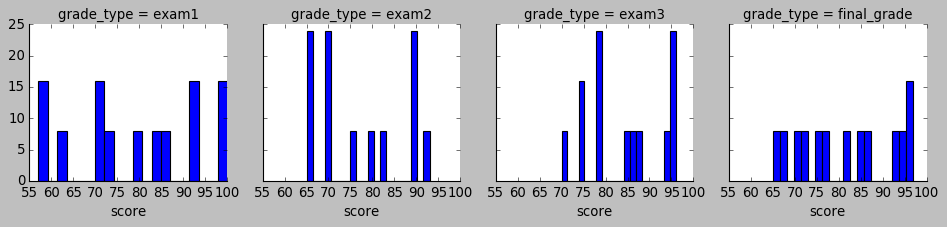

In [546]:
# Histogram

grid = sns.FacetGrid(df_melted, col='grade_type', margin_titles=True)
grid.map(plt.hist, 'score', bins=20)

# grid = sns.FacetGrid(df_melted, col="grade_type", margin_titles=True)
# grid.map(plt.hist, "score", bins=20);

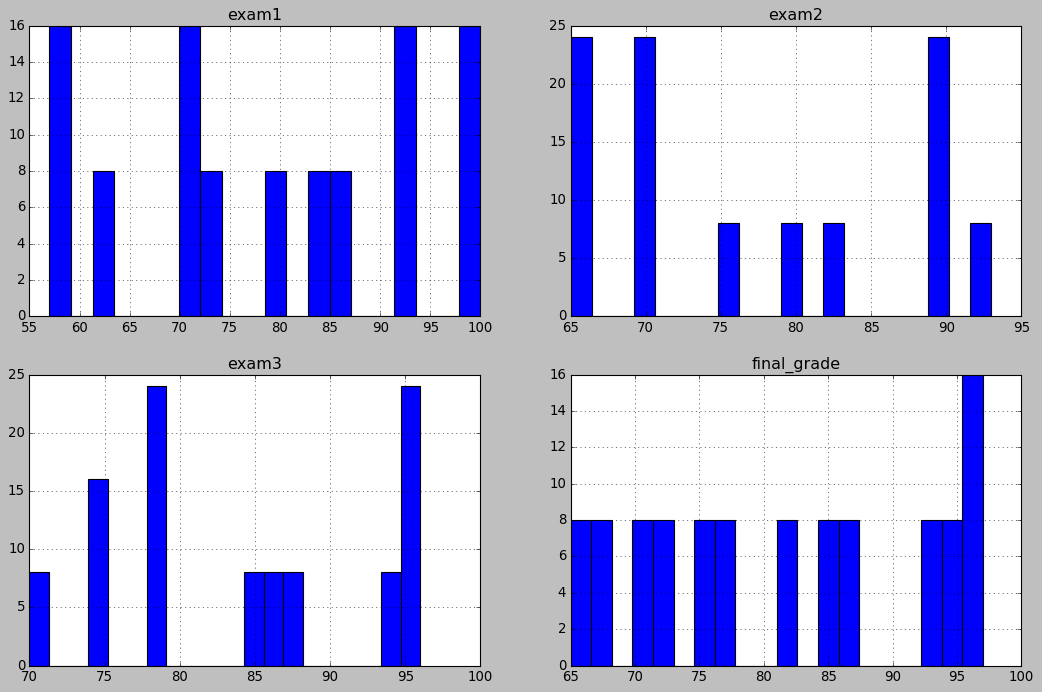

In [547]:
plt.figure(figsize=(16,10))
for i, col in enumerate(['exam1', 'exam2','exam3', 'final_grade']):
    plot_number = i + 1
    series = df_grades[col]
    plt.subplot(2, 2, plot_number)
    plt.title(col)
    series.hist(bins=20, density=False, cumulative=False, log=False)

# plt.figure(figsize=(16, 10))

# for i, col in enumerate(['exam1', 'exam2', 'exam3', 'final_grade']):
#     plot_number = i + 1 # i starts at 0, but plot nos should start at 1
#     series = df[col]
#     plt.subplot(2, 2, plot_number)
#     plt.title(col)
#     series.hist(bins=20, density=False, cumulative=False, log=False)

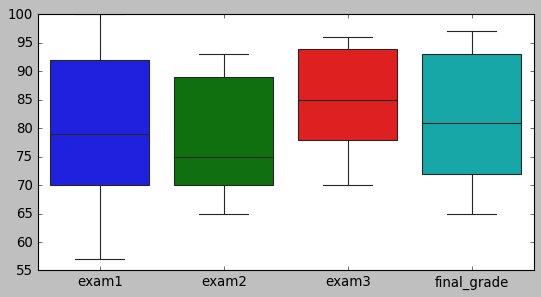

In [548]:
plt.figure(figsize=(8,4))

sns.boxplot(data=df_grades.drop(columns=['student_id']))

In [611]:
# test_train_split
# X = df_grades.drop(['final_grade','student_id'], axis=1)
# y = df_grades[['final_grade']]
# # X = df_grades.drop(['final_grade','student_id'], axis=1)
# # y = df_grades[['final_grade']]

# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=0)

# train = pd.concat([X_train, y_train], axis=1)
# test = pd.concat([X_test, y_test], axis=1)


X = df_grades.drop(['final_grade','student_id'], axis=1)
y = df_grades[['final_grade']]

print(X.head())
print(y.head())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=0)

train = pd.concat([X_train, y_train], axis=1)
print("Train columns:  %s" % list(train.columns))
print("Train dimensions (rows, columns):", train.shape)
print('\n')

test = pd.concat([X_test, y_test], axis=1)
print("Test columns:  %s" % list(test.columns))
print("Test dimensions (rows, columns):", test.shape)

In [550]:
if X_train.shape[0] == y_train.shape[0]:
    print('X & y train rows ARE INDEED equal')
else:
    print('X & y train rows are NOT equal')

if X_test.shape[0] == y_test.shape[0]:
    print('X & y test rows ARE INDEED equal')
else:
    print('X & y test rows are NOT equal')

if train.shape[1] == test.shape[1]:
    print('Number of columns in train & test ARE INDEED equal')
else:
    print('Number of columns in train & test are NOT equal')


train_split = train.shape[0] / (train.shape[0] + test.shape[0])
test_split = test.shape[0] / (train.shape[0] + test.shape[0])

print('Train Split: %.2f' % train_split)
print('Test Split: %.2f' % test_split)

X & y train rows ARE INDEED equal
X & y test rows ARE INDEED equal
Number of columns in train & test ARE INDEED equal
Train Split: 0.80
Test Split: 0.20


/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


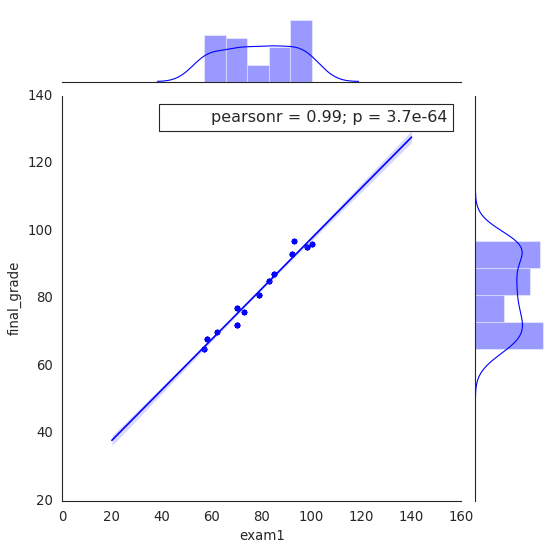

In [551]:
with sns.axes_style('white'):
    j = sns.jointplot('exam1', 'final_grade', data=train, kind='reg', height=7);
    j.annotate(stats.pearsonr)
plt.show()

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


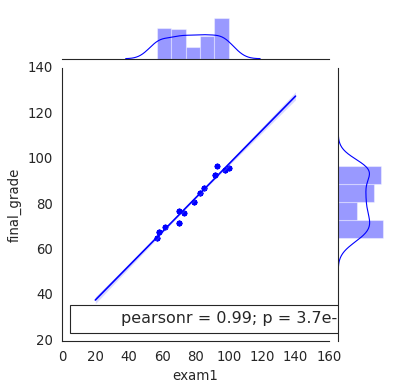

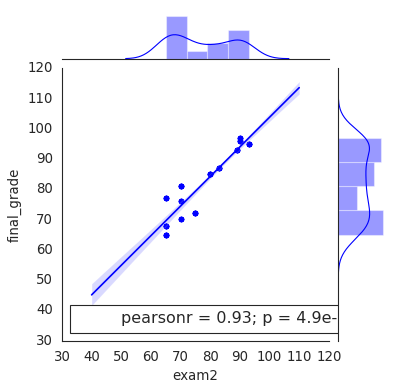

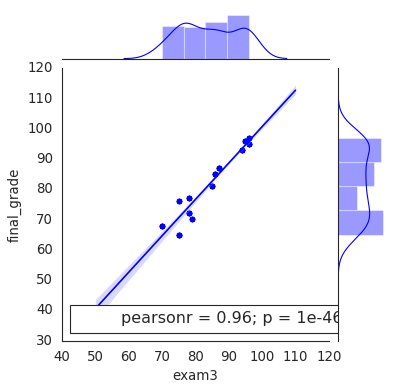

In [552]:
for i, col in enumerate(['exam1', 'exam2','exam3']):
       with sns.axes_style('white'):
            plot_number = i + 1
            series = df_grades[col]
            j = sns.jointplot(train[col], "final_grade", data=train, kind='reg', height=5)
            j.annotate(stats.pearsonr)
plt.show()

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


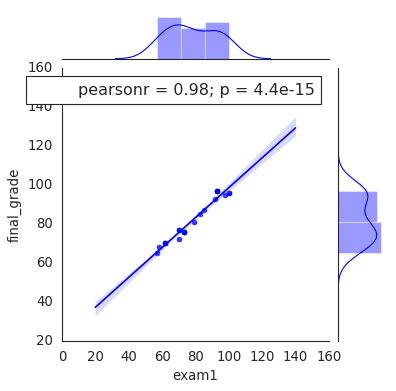

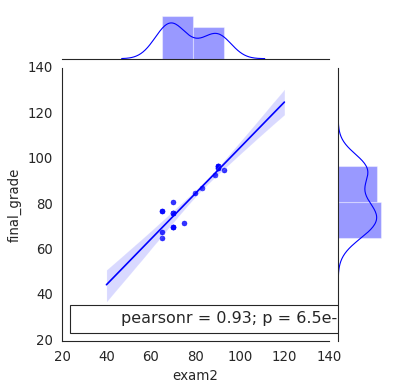

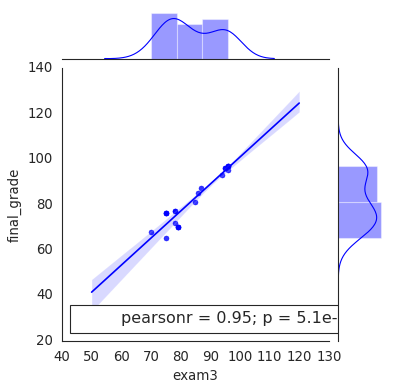

In [553]:
for i, col in enumerate(['exam1', 'exam2','exam3']):
       with sns.axes_style('white'):
            plot_number = i + 1
            series = df_grades[col]
            j = sns.jointplot(test[col], "final_grade", data=test, kind='reg', height=5)
            j.annotate(stats.pearsonr)
plt.show()

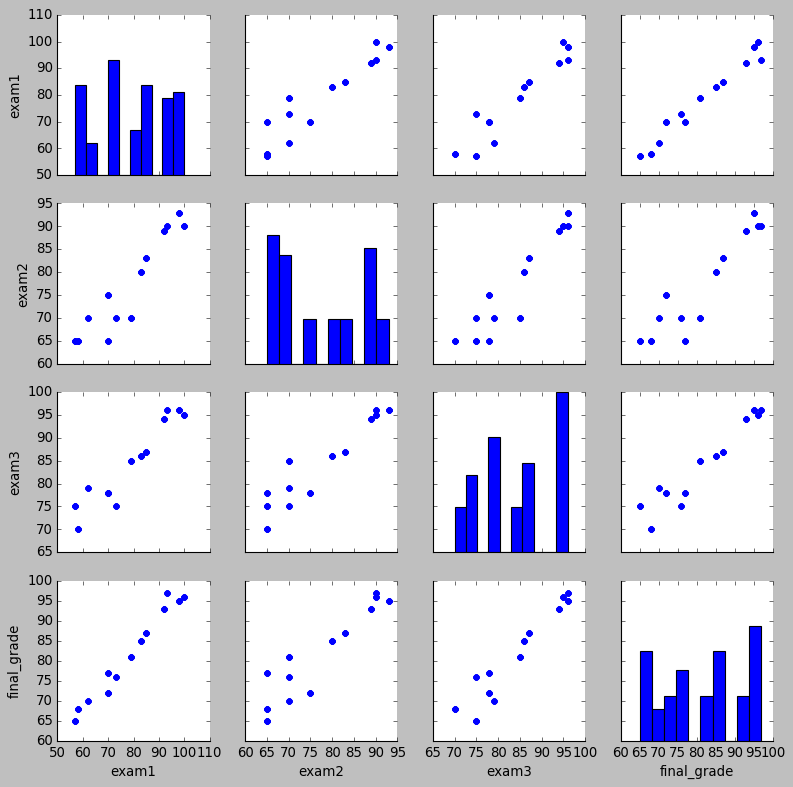

In [554]:
g = sns.PairGrid(train)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

# train dataframe

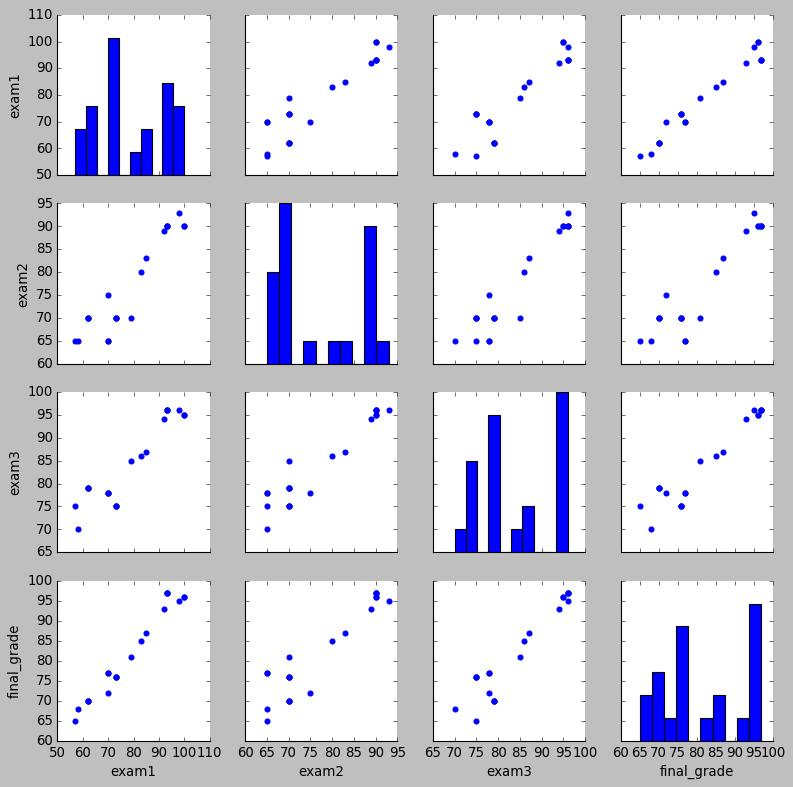

In [555]:
g = sns.PairGrid(test)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

# test dataframe

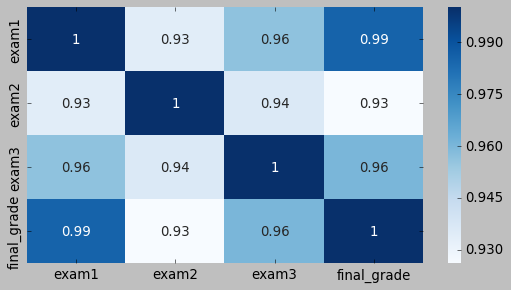

In [556]:
plt.figure(figsize=(8,4))
sns.heatmap(train.corr(), cmap='Blues', annot=True)

# plt.figure(figsize=(8,4))
# sns.heatmap(train.corr(), cmap='Blues', annot=True)

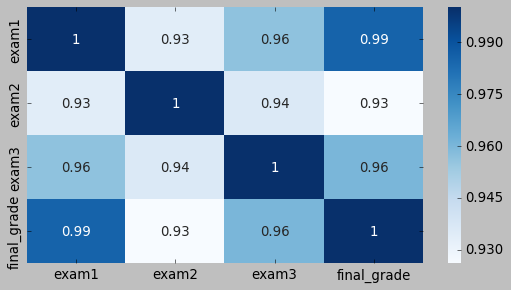

In [557]:
plt.figure(figsize=(8,4))
htmp_grds = sns.heatmap(train.corr(), cmap='Blues', annot=True)
# sns.boxplot(data=train())

# for i, col in enumerate([htmp_grds, boxp_grds]):
#        with sns.axes_style('white'):
#             plot_number = i + 1

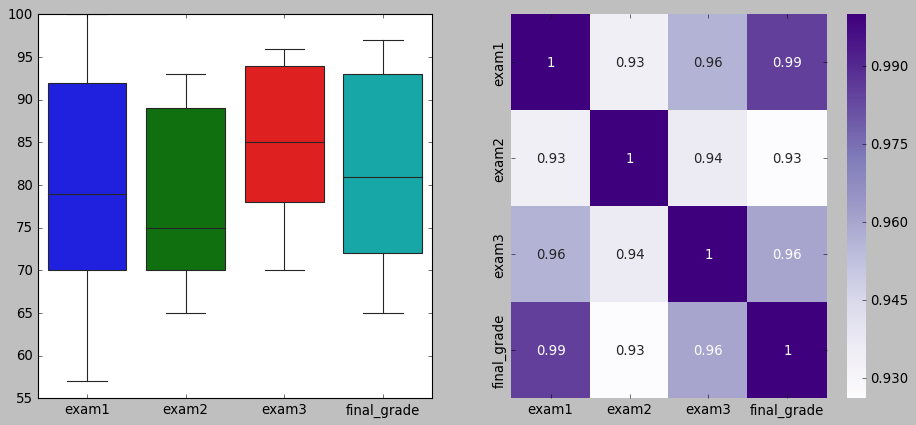

In [558]:
fig, ax = plt.subplots(1,2,figsize=(14,6))

sns.boxplot(data=df_grades.drop(columns=['student_id']), ax=ax[0])
sns.heatmap(train.corr(), ax=ax[1], annot=True, cmap='Purples')
plt.show()

In [559]:
pearsonr(X_train[['exam1']], y_train)

# this generates the R-square and the p-value

(array([0.98548827]), array([3.67959731e-64]))

In [560]:
[[column, pearsonr(train[column], train.final_grade)] for column in X_train]

#this generates the column name (x axes), the pearsonr and the p-value for each column (each X axes) in train df,
# in correlation with the train.final_grade (y axis)

[['exam1', (0.9854882734738365, 3.679597306767771e-64)],
 ['exam2', (0.9260773842724218, 4.9387065956533756e-36)],
 ['exam3', (0.9604227932900589, 1.0003417783597307e-46)]]

In [561]:
ols_model = sm.OLS(y_train, X_train)
fit = ols_model.fit()
fit.summary()

#this is just like the regression print out / descriptive statistics thing in EXCEL

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            final_grade   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.103e+04
Date:                Tue, 19 Mar 2019   Prob (F-statistic):          3.76e-131
Time:                        16:45:34   Log-Likelihood:                -170.25
No. Observations:                  83   AIC:                             346.5
Df Residuals:                      80   BIC:                             353.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
exam1          0.4555      0.036     12.625      0.000       0.384       0.527
exam2         -0.0307      0.063     -0.486      0.629      -0.157       0.095
exam3          0.5728      0.049     11.633      0.000       0.475       0.671
==============================================================================
Omnibus:                       30.491   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.671
Skew:                           0.427   Prob(JB):                       0.0216
Kurtosis:                       1.780   Cond. No.                         51.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Linear Model 1

In [562]:
lm1 = LinearRegression()
print(lm1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [563]:
# this is fitting the model we created above, using the exam1 field from the X_train df as the 'X',
# and y_train as the 'y'.

lm1.fit(X_train[['exam1']], y_train)
print(lm1)

# below creates the coefficient values for the y-intercept and the respective coefficients for each X:
lm1_y_intercept = lm1.intercept_
print(lm1_y_intercept).

lm1_coefficients = lm1.coef_
print(lm1_coefficients)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[22.88211318]
[[0.74850854]]


In [564]:
print('Univariate - final_exam = b + m * exam1')
print('    y-intercept (b): %.2f' % lm1_y_intercept)
print('    coefficient (m): %.2f' % lm1_coefficients[0])
print()

Univariate - final_exam = b + m * exam1
    y-intercept (b): 22.88
    coefficient (m): 0.75



In [565]:
# This makes predictions based on the model created above.
y_pred_lm1 = lm1.predict(X_train[['exam1']])

using sklearn.mean_squared_error and sklearn.r2_score.

Now let's take a look at a couple performance metrics for our models: the mean squared error and r-squared values.

In [566]:
# MSE:

mse_lm1 = mean_squared_error(y_train, y_pred_lm1)
print('lm1\n  mse: {:.3}'.format(mse_lm1))

lm1
  mse: 3.37


In [567]:
# r-squared values:

r2_lm1 = r2_score(y_train, y_pred_lm1)
print('  {:.2%} of the variance of the student''s final grade can be explained by the grade on the first exam.'.format(r2_lm1))

  97.12% of the variance of the students final grade can be explained by the grade on the first exam.


Text(0, 0.5, 'Residuals')

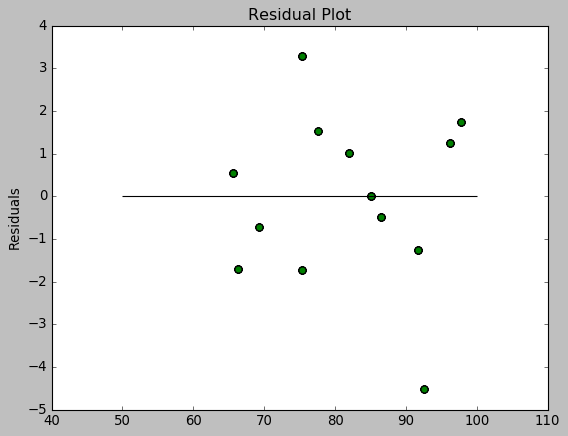

In [568]:
plt.scatter(y_pred_lm1, y_pred_lm1 - y_train, c='g', s=40)
plt.hlines(y=0, xmin=50, xmax=100)
plt.title('Residual Plot')
plt.ylabel('Residuals')

#### linear model 2: lm2

In [569]:
lm2 = LinearRegression()
print(lm2)

# lm2 uses both exam1 and exam3

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [570]:
# this is fitting the model we created above, using the exam1 and exam3 fields from the X_train df as the 'X',
# and y_train as the 'y'.

lm2.fit(X_train[['exam1', 'exam3']], y_train)
print(lm2)

# below creates the coefficient values for the y-intercept and the respective coefficients for each X:
lm2_y_intercept = lm2.intercept_
print(lm2_y_intercept)

lm2_coefficients = lm2.coef_
print(lm2_coefficients)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[12.79518052]
[[0.59709165 0.26106586]]


In [571]:
print('Multivariate - final_exam = b + m1 * exam1 + m2 * exam3')
print('    y-intercept  (b): %.2f' % lm2_y_intercept)
print('    coefficient (m1): %.2f' % lm2_coefficients[0][0])
print('    coefficient (m2): %.2f' % lm2_coefficients[0][1])
print()

Multivariate - final_exam = b + m1 * exam1 + m2 * exam3
    y-intercept  (b): 12.80
    coefficient (m1): 0.60
    coefficient (m2): 0.26



In [572]:
# This makes predictions based on the model created above.
y_pred_lm2 = lm2.predict(X_train[['exam1', 'exam3']])

using sklearn.mean_squared_error and sklearn.r2_score.

Now let's take a look at a couple performance metrics for our models: the mean squared error and r-squared values.

In [573]:
# MSE:

mse_lm2 = mean_squared_error(y_train, y_pred_lm2)
print('lm2\n  mse: {:.3}'.format(mse_lm2))


# r-squared values:

r2_lm2 = r2_score(y_train, y_pred_lm2)
print('  {:.2%} of the variance of the student''s final grade can be explained by the grade on the first and third exam.'.format(r2_lm2))

lm2
  mse: 2.94
  97.49% of the variance of the students final grade can be explained by the grade on the first and third exam.


Text(0.5, 1.0, 'Predicted vs Actual Final Grade')

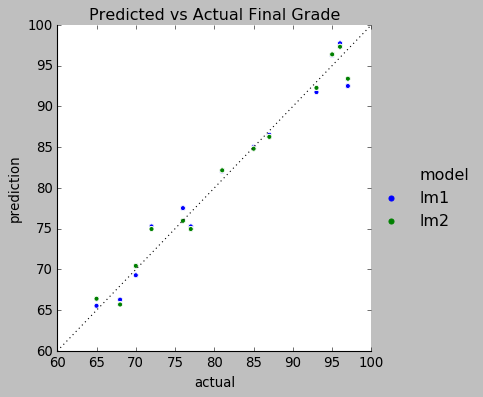

In [574]:
# "predictions plot" section:

# the predictions are a 1 x 83 two dimensional matrix, but we want just
# a single array of predictions. We can use the .ravel method to achieve
# this.

pd.DataFrame({'actual': y_train.final_grade,
             'lm1': y_pred_lm1.ravel(),
             'lm2': y_pred_lm2.ravel()})\
    .melt(id_vars=['actual'], var_name='model', value_name='prediction')\
    .pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')

plt.plot([60, 100],[60, 100], c='black', ls=':')
plt.ylim(60, 100)
plt.xlim(60, 100)
plt.title('Predicted vs Actual Final Grade')

### Fit, predict, and evaluate one more model, lm3, using exam 3 only.

In [575]:
lm3 = LinearRegression()
print(lm3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [576]:
# this is fitting the model we created above, using the exam1 field from the X_train df as the 'X',
# and y_train as the 'y'.

lm3.fit(X_train[['exam3']], y_train)
print(lm3)

# below creates the coefficient values for the y-intercept and the respective coefficients for each X:
lm3_y_intercept = lm3.intercept_
print(lm3_y_intercept)

lm3_coefficients = lm3.coef_
print(lm3_coefficients)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[-19.62667326]
[[1.20315159]]


In [577]:
print('Univariate - final_exam = b + m * exam3')
print('    y-intercept (b): %.2f' % lm3_y_intercept)
print('    coefficient (m): %.2f' % lm3_coefficients[0])
print()

Univariate - final_exam = b + m * exam3
    y-intercept (b): -19.63
    coefficient (m): 1.20



In [578]:
# This makes predictions based on the model created above.
y_pred_lm3 = lm3.predict(X_train[['exam3']])

using sklearn.mean_squared_error and sklearn.r2_score.

Now let's take a look at a couple performance metrics for our models: the mean squared error and r-squared values.

In [579]:
# MSE:

mse_lm3 = mean_squared_error(y_train, y_pred_lm3)
print('lm3\n  mse: {:.3}'.format(mse_lm3))

lm3
  mse: 9.08


In [580]:
# r-squared values:

r2_lm3 = r2_score(y_train, y_pred_lm3)
print('  {:.2%} of the variance of the student''s final grade can be explained by the grade on the third exam.'.format(r2_lm3))

  92.24% of the variance of the students final grade can be explained by the grade on the third exam.


Text(0, 0.5, 'Residuals')

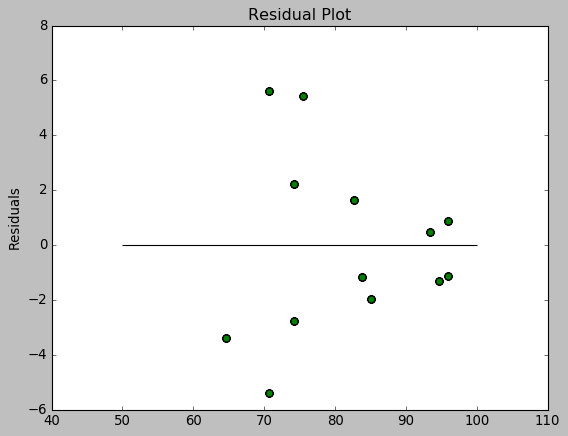

In [581]:
plt.scatter(y_pred_lm3, y_pred_lm3 - y_train, c='g', s=40)
plt.hlines(y=0, xmin=50, xmax=100)
plt.title('Residual Plot')
plt.ylabel('Residuals')

### How does the result of the model compare to the other two? Which should you use, based on these results?

Text(0.5, 1.0, 'Predicted vs Actual Final Grade')

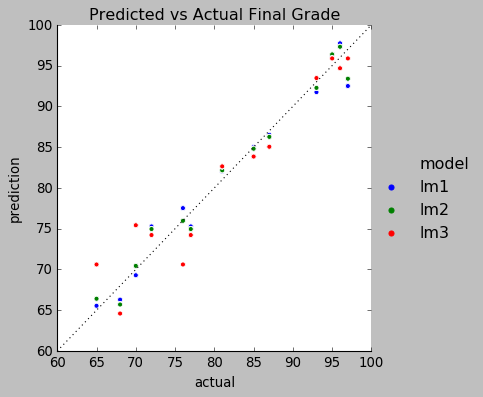

In [582]:
pd.DataFrame({'actual': y_train.final_grade,
             'lm1': y_pred_lm1.ravel(),
             'lm2': y_pred_lm2.ravel(),             
             'lm3': y_pred_lm3.ravel()})\
    .melt(id_vars=['actual'], var_name='model', value_name='prediction')\
    .pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')

plt.plot([60, 100],[60, 100], c='black', ls=':')
plt.ylim(60, 100)
plt.xlim(60, 100)
plt.title('Predicted vs Actual Final Grade')

In [583]:
# lm1 (exam1 only) gives good results, MSE, r^2, p-value.
# lm2 (exam1 & exam3) gives better results than lm1.
# lm3 (exam3 only) gives the worst results of the three linear models.

# Recommend only using lm2 as the model, going forward.

### 13. Scikit-Learn: Out-of-sample predictions using best model
Predict final grades using testing data

In [602]:
# Make predictions using the testing set
y_pred_lm1 = lm1.predict(X_test[['exam1']])
y_pred_lm2 = lm2.predict(X_test[['exam1', 'exam3']])
y_pred_lm3 = lm3.predict(X_test[['exam3']])

print('Predicted grades associated with y_pred_lm1:\n')
y_pred_lm1

Predicted grades associated with y_pred_lm1:



array([[97.73296682],
       [69.28964244],
       [86.50533877],
       [66.29560829],
       [77.52323634],
       [69.28964244],
       [85.0083217 ],
       [75.27771073],
       [92.49340707],
       [91.74489853],
       [96.23594975],
       [82.01428756],
       [75.27771073],
       [97.73296682],
       [77.52323634],
       [92.49340707],
       [69.28964244],
       [65.54709975],
       [77.52323634],
       [75.27771073],
       [92.49340707]])

In [598]:
print('Predicted grades associated with y_pred_lm2:\n')
y_pred_lm2

Predicted grades associated with y_pred_lm2:



array([[97.30560185],
       [70.43906555],
       [86.26070028],
       [65.70110622],
       [75.9628102 ],
       [70.43906555],
       [84.80545113],
       [74.95473285],
       [93.38702619],
       [92.26780282],
       [96.37248442],
       [82.15601869],
       [74.95473285],
       [97.30560185],
       [75.9628102 ],
       [93.38702619],
       [70.43906555],
       [66.40934388],
       [75.9628102 ],
       [74.95473285],
       [93.38702619]])

In [604]:
print('Predicted grades associated with y_pred_lm3:\n')
y_pred_lm3

Predicted grades associated with y_pred_lm3:



array([[94.67272812],
       [75.42230263],
       [85.04751537],
       [64.59393828],
       [70.60969625],
       [75.42230263],
       [83.84436378],
       [74.21915103],
       [95.87587972],
       [93.46957653],
       [95.87587972],
       [82.64121219],
       [74.21915103],
       [94.67272812],
       [70.60969625],
       [95.87587972],
       [75.42230263],
       [70.60969625],
       [70.60969625],
       [74.21915103],
       [95.87587972]])

In [603]:
print(y_pred_lm1.mean())
print(y_pred_lm2.mean())
print(y_pred_lm3.mean())

81.55092512770166
81.5626197875983
81.60993939286034


In [605]:
mse_lm1 = mean_squared_error(y_test, y_pred_lm1)
print('Mean squared error for lm1: %.2f' % mse_lm1)

mse_lm2 = mean_squared_error(y_test, y_pred_lm2)
print('Mean squared error for lm2: %.2f' % mse_lm2)

mse_lm3 = mean_squared_error(y_test, y_pred_lm3)
print('Mean squared error for lm3: %.2f' % mse_lm3)


Mean squared error for lm1: 4.75
Mean squared error for lm2: 3.42
Mean squared error for lm3: 12.14


In [606]:
r2_lm1 = r2_score(y_test, y_pred_lm1)
print('For lm1: {:.2%} of the variance in the student''s final grade can be explained by the grades on the first exam.'.format(r2_lm1))

r2_lm2 = r2_score(y_test, y_pred_lm2)
print('For lm2: {:.2%} of the variance in the student''s final grade can be explained by the grades on the first and third exams.'.format(r2_lm2))

r2_lm3 = r2_score(y_test, y_pred_lm3)
print('For lm3: {:.2%} of the variance in the student''s final grade can be explained by the grades on the third exam.'.format(r2_lm3))

For lm1: 96.12% of the variance in the students final grade can be explained by the grades on the first exam.
For lm2: 97.20% of the variance in the students final grade can be explained by the grades on the first and third exams.
For lm3: 90.07% of the variance in the students final grade can be explained by the grades on the third exam.


#### Now add "predictions plot" here... search cells above for this phrase: "predictions plot" but now using the TEST data.

Text(0.5, 1.0, 'Predicted vs Actual Final Grade')

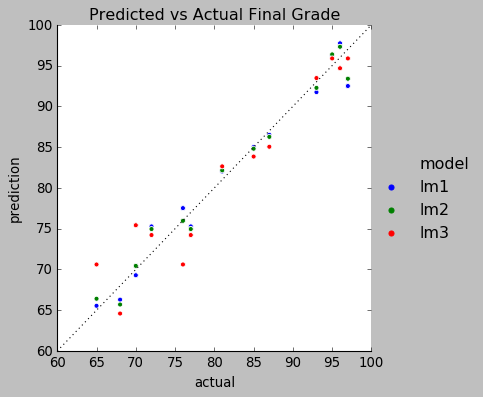

In [607]:
pd.DataFrame({'actual': y_test.final_grade,
             'lm1': y_pred_lm1.ravel(),
             'lm2': y_pred_lm2.ravel(),             
             'lm3': y_pred_lm3.ravel()})\
    .melt(id_vars=['actual'], var_name='model', value_name='prediction')\
    .pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')

plt.plot([60, 100],[60, 100], c='black', ls=':')
plt.ylim(60, 100)
plt.xlim(60, 100)
plt.title('Predicted vs Actual Final Grade')

Text(0, 0.5, 'Residuals')

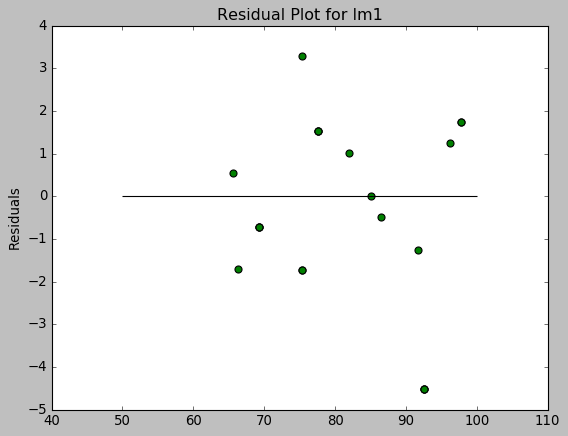

In [608]:
plt.scatter(y_pred_lm1, y_pred_lm1 - y_test, c='g', s=40)
plt.hlines(y=0, xmin=50, xmax=100)
plt.title('Residual Plot for lm1')
plt.ylabel('Residuals')

Text(0, 0.5, 'Residuals')

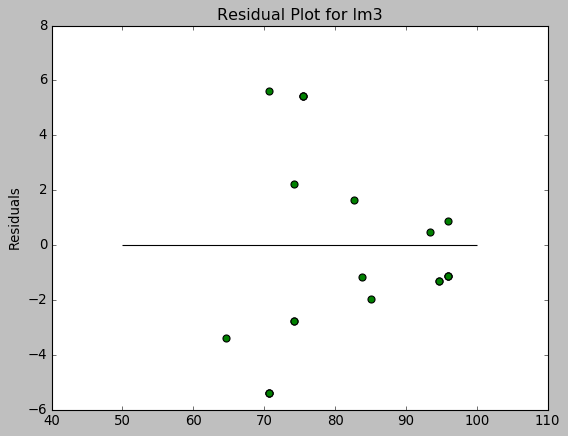

In [591]:
plt.scatter(y_pred_lm3, y_pred_lm3 - y_test, c='g', s=40)
plt.hlines(y=0, xmin=50, xmax=100)
plt.title('Residual Plot for lm3')
plt.ylabel('Residuals')

In [ ]:
now start on telco: